---
title: Model validity - relevant predictors
teaching: 45
exercises: 2
keypoints:
- "All models are wrong, but some are useful."
- "Before reading into a model's estimated coefficients, modelers must take care to account for essential predictor variables"
- "Models that do not account for essential predictor variables can produce distorted pictures of reality due to omitted variable bias and confounding effects."
objectives:
- "Understand the importance of including relevant predictors in a model."
questions:
- "What are the benfits/costs of including additional predictors in a regression model?"
---

### Model Validity And Interpretation
While using models strictly for predictive purposes is a completely valid approach for some domains and problems, researchers typically care more about being able to interpret their models such that interesting relationships between predictor(s) and target can be discovered and measured. When interpretting a linear regression model, we can look at the model's estimated coefficients and p-values associated with each predictor to better understand the model. The coefficient's magnitude can inform us of the effect size associated with a predictor, and the p-value tells us whether or not a predictor has a consistent (statistically significant) effect on the target. 

**Before we can blindly accept the model's estimated coefficients and p-values, we must answer three questions that will help us determine whether or not our model is valid.**

#### Model Validity Assessments
1. **Accounting for relevant predictors**: Have we included all relevant predictors in the model?
2. **Bias/variance or under/overfitting**: Does the model capture the variability of the target variable well? Does the model generalize well?
3. **Model assumptions**: Does the fitted model follow the 5 assumptions of linear regression?

We will discuss the first two assessments in detail throughout this episode.

### 1. Relevant predictors

#### EXERCISE_START: Benefits and drawbacks of including all relevant predcitors
What do you think might be some benefits of including all relevant predictors in a model that you intend to use to **explain** relationships? Are there any drawbacks you can think of?
#### EXERCISE_SOLUTION
Including all relevant predictor variables in a model is important for several reasons:

1. **Improving model interpretability**: Leaving out relevant predictors can result in *model misspecification*. Misspecification refers to a situation where the model structure or functional form does not accurately reflect the underlying relationship between the predictors and the outcome. If a relevant predictor is omitted from the model, the coefficients of the remaining predictors may be biased. This occurs because the omitted predictor may have a direct or indirect relationship with the outcome variable, and its effect is not accounted for in the model. Consequently, the estimated coefficients of other predictors may capture some of the omitted predictor's effect, leading to biased estimates.

2. **Improving predicitive accuracy and reducing residual variance**: Omitting relevant predictors can increase the residual variance in the model. Residual variance represents the unexplained variation in the outcome variable after accounting for the predictors in the model. If a relevant predictor is left out, the model may not fully capture the systematic variation in the data, resulting in larger residuals and reduced model fit. While it is true that, in a research setting, we typically care more about being able to interpret our model than being able to perfectly predict the target variable, a model that severely underfits is still a cause for concern since the model won't be capturing the variability of the data well enough to form any conclusions.

3. **Robustness to future changes**: This benefit only applies to predictive modeling tasks where models are often being fit to new data. By including all relevant predictors, the model becomes more robust to changes in the data or the underlying system. If a predictor becomes important in the future due to changes in the environment or additional data, including it from the start ensures that the model is already equipped to capture its influence.

**Drawbacks to including all relevant predictors:** While one should always aim to include as many relevant predictors as possible, this goal needs to be balanced with overfitting concerns. If we include too many predictors in the model and train on a limited number of observations, the model may simply memorize the nuances/noise in the data rather than capturing the underlying trend in the data.
#### EXERCISE_END

#### Example
Let's consider a regression model where we want to evaluate the relationship between FullBath (number of bathrooms) and SalePrice. 

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto') #
y=housing['target']
X=housing['data']['FullBath']
print(X.shape)
X.head()

(1460,)


0    2
1    2
2    2
3    1
4    2
Name: FullBath, dtype: int64

It's always a good idea to start by plotting the predictor vs the target variable to get a sense of the underlying relationship.

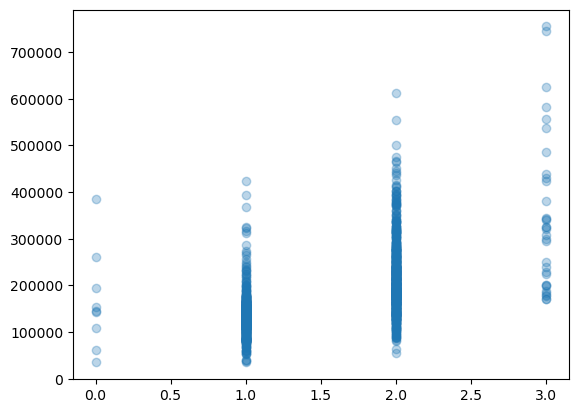

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=.3);
# plt.savefig('..//fig//regression//relevant_predictors//scatterplot_fullBath_vs_salePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/relevant_predictors/scatterplot_fullBath_vs_salePrice.png"  align="center" width="30%" height="30%">

Since the relationship doesn't appear to be quite as linear as we were hoping, we will try a log transformation as we did in the previous episode.

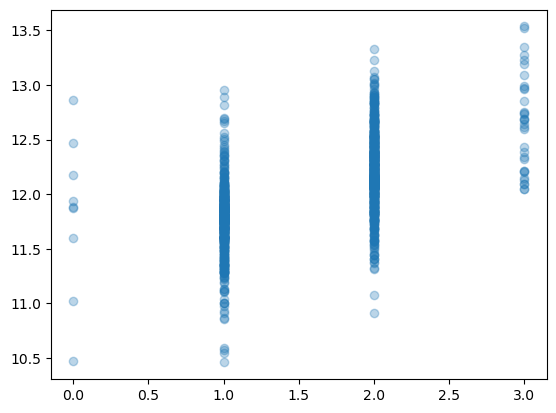

In [3]:
import numpy as np
y_log = y.apply(np.log)
plt.scatter(X,y_log, alpha=.3);
# plt.savefig('..//fig//regression//relevant_predictors//scatterplot_fullBath_vs_logSalePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/relevant_predictors/scatterplot_fullBath_vs_logSalePrice.png"  align="center" width="30%" height="30%">

The log transform improves the linear relationship substantially! 

### Standardizing scale of predictors
We'll compare the coefficients estimated from this model to an additional univariate model. To make this comparison more straightforward, we will z-score the predictor. If you don't standardize the scale of all predictors being compared, the coefficient size will be a function of the scale of each specific predictor rather than a measure of each predictor's overall influence on the target.

In [4]:
X = (X - X.mean())/X.std()
X.head()

0    0.789470
1    0.789470
2    0.789470
3   -1.025689
4    0.789470
Name: FullBath, dtype: float64

### Statsmodels for model fitting and interpretation
Next, we will import the statsmodels package which is an R-style modeling package that has some convenient functions for rigorously testing and running stats on linear models. 

For efficiency, we will skip train/test splits for now. Recall that train/test splits aren't as essential when working with only a handful or predictors (i.e., when the ratio between number of training observations and model parameters/coefficients is at least 10).

Fit the model. Since we are now turning our attention towards explanatory models, we will use the statsmodels library isntead of sklearn. Statsmodels comes with a variety of functions which make it easier to interpret the model and ultimately run hypothesis tests. It closely mirrors the way R builds linear models.

In [5]:
import statsmodels.api as sm

# Add a constant column to the predictor variables dataframe - this acts as the y-intercept for the model
X = sm.add_constant(X)
X.head()

const  FullBath
0    1.0  0.789470
1    1.0  0.789470
2    1.0  0.789470
3    1.0 -1.025689
4    1.0  0.789470

Note: statsmodels is smart enough to not re-add the constant if it has already been added

In [6]:
X = sm.add_constant(X)
X.head()

const  FullBath
0    1.0  0.789470
1    1.0  0.789470
2    1.0  0.789470
3    1.0 -1.025689
4    1.0  0.789470

In [7]:
# Fit the multivariate regression model
model = sm.OLS(y_log, X)
results = model.fit()

Let's print the coefs from this model. In addition, we can quickly extract R-squared from the statsmodel model object using...

In [8]:
print(results.params,'\n')
print(results.pvalues,'\n')
print('R-squared:', results.rsquared)

const       12.024051
FullBath     0.237582
dtype: float64 

const        0.000000e+00
FullBath    2.118958e-140
dtype: float64 

R-squared: 0.3537519976399338


You can also call results.summary() for a detailed overview of the model's estimates and resulting statistics. 

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     798.1
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.12e-140
Time:                        21:14:09   Log-Likelihood:                -412.67
No. Observations:                1460   AIC:                             829.3
Df Residuals:                    1458   BIC:                             839.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0241      0.008   1430.258      0.000      12.008      12.041
FullBath       0.2376      0.008     28.251      0.000       0.221       0.254
==============================================================================
Omnibus:                       51.781   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.501
Skew:                           0.016   Prob(JB):                     1.88e-31
Kurtosis:                       4.525   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the R-squared, this model explains 35.4% of the variance in the SalePrice target variable. 

The model coefficient estimated for the "FullBath" predictor is 0.24. Recall that we fit this model to a log scaled version of the SalePrice. In other words, increasing the FullBath predictor by 1 standard deviation increases the log(SalePrice) by 0.24. While this explanation is completely valid, it is often useful to interpret the coefficient in terms of the original scale of the target variable. 

#### Transforming the coefficient to the original scale of the data.
Exponentiate the coefficient to reverse the log transformation. This gives the multiplicative factor for every one-unit increase in the independent variable. In our model (run code below), for every standard devation increase in the predictor, our target variable increases by a factor of about 1.27, or 27%. Recall that multiplying a number by 1.27 is the same as increasing the number by 27%. Likewise, multiplying a number by, say 0.3, is the same as decreasing the number by 1 – 0.3 = 0.7, or 70%.

In [10]:
np.exp(results.params[1]) # First param is the estimated coef for the y-intercept / "const". The second param is the estimated coef for FullBath.

1.2681792421553808

#### Bonus: Unpacking the coefficient transformation
When we have a linear model fit to the logarithm of the target variable, the general form of the model can be written as:

$\log(y) = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n$

Where:
* $\log(y)$ is the natural logarithm of the target variable $y$.
* $b_0, b_1, b_2, ..., b_n$ are the estimated coefficients.
* $x_1, x_2, ..., x_n$ are the predictor variables.

Now, if you want to express the effect of a one-unit change in one of the predictor variables on the original target variable $y$, you can take the exponential of both sides of the equation:

$ \exp(\log(y)) = \exp(b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n) $

$ y = \exp(b_0) \times \exp(b_1 x_1) \times \exp(b_2 x_2) \times ... \times \exp(b_n \times x_n) $

When you're specifically interested in the multiplicative change associated with a one-unit change in a particular predictor variable (let's call it $x_1$), you don't actually need to include the $x_1$ term in the equation. This is because when $x_1$ changes by 1 unit, the multiplicative effect is solely captured by $\exp(b_1)$.

$ y = \exp(b_0) \times \exp(b_1) \times \exp(b_2) \times ... \times \exp(b_n) $

Notice in the above equation, that coefficients are multiplied. This is where we get the "multiplicative change" from.

#### Log review
Remember that $\exp()$ is the inverse of the natural logarithm, $\log()$.

In [ ]:
e = 2.71828 #... (irrational number) Euler's number, base of the natural log
x = 2
e_squared = e**x # raise e to the power of x
e_squared_exact = np.exp(x)

print(f'e_squared = {e_squared}')
print(f'e_squared_exact = {e_squared_exact}')

# take the natural log (ln)
print(f'log(e_squared) = {np.log(e_squared)}') 
print(f'log(e_squared_exact) = {np.log(e_squared_exact)}') 

#### Comparing predictors

When transformed to the original data scale, this coefficient tells us that increasing bathroom count by 1 standard deviation increases the sale price, on average, by 27%. While bathrooms are a very hot commodity to find in a house, they likely don't deserve this much credit. Let's do some further digging by comparing another predictor which likely has a large impact on SalePrice — the total square footage of the house (excluding the basement).

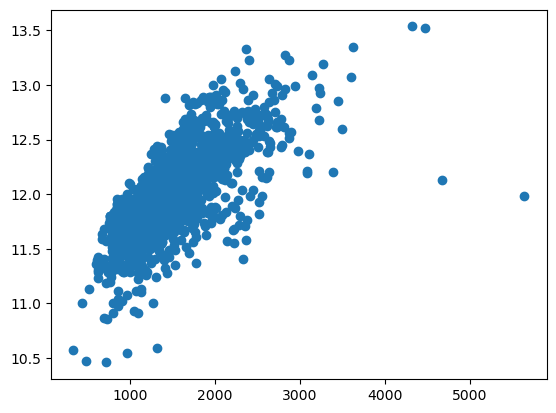

In [11]:
X=housing['data']['GrLivArea']
plt.scatter(X, y_log);
# plt.savefig('..//fig//regression//relevant_predictors//scatterplot_GrLivArea_vs_logSalePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/relevant_predictors/scatterplot_GrLivArea_vs_logSalePrice.png"  align="center" width="30%" height="30%">

As before, we will z-score the predictor. This is a critical step when comparing coefficient estimates since the estimates are a function of the scale of the predictor.

In [12]:
X = (X - X.mean())/X.std()
X.head()

0    0.370207
1   -0.482347
2    0.514836
3    0.383528
4    1.298881
Name: GrLivArea, dtype: float64

Fit the model and print coefs/R-squared.

In [13]:
# Add a constant column to the predictor variables dataframe
X = sm.add_constant(X)
print(X.head())
# Fit the multivariate regression model
model = sm.OLS(y_log, X)
results = model.fit()
print(results.params)
print('R-squared:', results.rsquared)

   const  GrLivArea
0    1.0   0.370207
1    1.0  -0.482347
2    1.0   0.514836
3    1.0   0.383528
4    1.0   1.298881
const        12.024051
GrLivArea     0.279986
dtype: float64
R-squared: 0.49129817224671934


Based on the R-squared, this model explains 49.1% of the variance in the target variable (higher than FullBath which is to be expected). Let's convert the coef to the original scale of the target data before reading into it.

In [14]:
np.exp(results.params[1]) # First param is the estimated coef for the y-intercept / "const". The second param is the estimated coef for FullBath.

1.3231118984358705

For every one standard devation increase in the predictor (GrLivArea), our target variable (SalePrice) increases by a factor of about 1.32, or 32%. 

Let's compare our findings with a multivariate regression model that includes both predictors.

In [15]:
predictors = ['GrLivArea', 'FullBath']
X=housing['data'][predictors]
X.head()

GrLivArea  FullBath
0       1710         2
1       1262         2
2       1786         2
3       1717         1
4       2198         2

##### Standardization

In [16]:
X = (X - X.mean())/X.std()
X.head()

GrLivArea  FullBath
0   0.370207  0.789470
1  -0.482347  0.789470
2   0.514836  0.789470
3   0.383528 -1.025689
4   1.298881  0.789470

Add constant for modeling y-intercept

In [17]:
# Fit the multivariate regression model
X = sm.add_constant(X)
X.head()

const  GrLivArea  FullBath
0    1.0   0.370207  0.789470
1    1.0  -0.482347  0.789470
2    1.0   0.514836  0.789470
3    1.0   0.383528 -1.025689
4    1.0   1.298881  0.789470

In [18]:
model = sm.OLS(y_log, X)
results = model.fit()
print(results.params)
print('R-squared:', results.rsquared)

const        12.024051
GrLivArea     0.216067
FullBath      0.101457
dtype: float64
R-squared: 0.530204241994317


#### EXERCISE_START: Comparing results
1. How does the R-squared of this model compare to the univariate models? Is the variance explained by the multivariate model equal to the sum of R-squared of each univariate model? Why or why not? 
2. Convert the coefficients to the original scale of the target variable as we did earlier in this episode. How much does SalePrice increase with a 1 standard deviation increase in each predictor?
3. How do the coefficient estimates compare to the univariate model estimates? Is there any difference? If so, what might be the cause?

#### EXERCISE_SOLUTION
**How does the R-squared of this model compare to the univariate models? Is the variance explained by the multivariate model equal to the sum of R-squared of each univariate model? Why or why not?**

The R-squared value in the multivariate model (53.0%) is somewhat larger than each of the univariate models (GrLivArea=49.1%, FullBath=35.4%) which illustrates one of the benefits of includign multiple predictors. When we add the R-squared values of the univariate models, we get 49.1 + 35.4 = 84.5%. This value is much larger than what we observe in the multivariate model. The reason we can't simply add the R-squared values together is because each univariate model fails to account for at least one relevant predictor. When we omit one of the predictors, the model assumes the observed relationship is only due to the remaining predictor. This causes the impact of each individual predictor to appear inflated (R-squared and coef magnitude) in the univariate models. 

**Convert the coefficients to the original scale of the target variable as we did earlier in this episode. How much does SalePrice increase with a 1 standard deviation increase in each predictor?**

First we'll convert the coefficients to the original scale of the target variable using the exp() function (the inverse of log).

##### CODE_START
print('GrLivArea:', np.exp(.216))
print('FullBath:', np.exp(.101))
##### CODE_END
##### OUTPUT_START
GrLivArea: 1.2411023790006717
FullBath: 1.1062766417634236
##### OUTPUT_END

Based on these results, increasing the GrLivArea by 1 standard deviation increases SalePrice by 24.1% (univariate = 32.3%), while increasing FullBath by 1 standard deviation increases SalePrice by only 10.6% (univariate = 26.8%). 

**How do the coefficient estimates compare to the univariate model estimates? Is there any difference? If so, what might be the cause?**

When using a multivariate model, the coefficients were reduced to a considerable degree compared to the univariate models. Why does this happen? Both SalePrice and FullBath linearly relate to SalePrice. If we model SalePrice while considering only one of these effects, the model will think that only one predictor is doing the work of multiple predictors. We call this effect *omitted-variable bias* or *omitted-predictor bias*. Omitted-variable bias leads to *model misspecification*, where the model structure or functional form does not accurately reflect the underlying relationship between the predictors and the outcome. If you want a more truthful model, it is critical that you include as many relevant predictors as possible. 

#### EXERCISE_END

### Including ALL predictors - overfitting concerns
While researchers should always strive to include as many many relevant predictors as possible, this must also be balanced with overfitting concerns. That is, it is often the case that some of the relevant predictors must be left out in order to ensure that overfitting does not occur. If we include too many predictors in the model and train on a limited number of observations, the model may simply memorize the nuances/noise in the data rather than capturing the underlying trend in the data.

Let's see how this plays out with the Ames housing dataset.

We'll first load and prep the full high-dimensional dataset. The following helper function...
1. loads the full Ames housing dataset
2. Encodes all categorical predictors appropriately (we'll discuss this step in detail in the next episode)
3. Removes sparse predictors with little to no variability (we'll discuss this step in detail in the next episode)
3. log scales the target variable, SalePrice
4. train/test splits the data

In [19]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto') #
y=housing['target']
X=housing['data']
print('X.shape[1]', X.shape[1])
import numpy as np
y_log = np.log(y)

from preprocessing import encode_predictors_housing_data
X_encoded = encode_predictors_housing_data(X) # use one-hot encoding to encode categorical predictors
print('X_encoded.shape[1]', X_encoded.shape[1]) 

from preprocessing import remove_bad_cols
X_encoded_good = remove_bad_cols(X_encoded, 98) # remove cols with nans and cols that are 98% constant
X_encoded_good.head()

print(X_encoded_good.shape)
print(y.shape)


X.shape[1] 80
X_encoded.shape[1] 215
99 columns removed, 116 remaining.
Columns removed: ['LotFrontage', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'GarageYrBlt', 'MasVnrArea', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', "Exterior2nd_'Brk Cmn'", 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'GarageType_2Types', 'GarageType_Basment', 'GarageType_CarPort', 'Heating_Floor', 'Heating_GasW', 'Heating_Grav', 'Heating_O

#### Train/test split 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_good, y_log, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)

(978, 116)
(482, 116)


#### Zscoring all predictors
Since we're now working with multiple predictors, we will zscore our data such that we can compare coefficient estimates across predictors. 

There is some additional nuance to this step when working with train/test splits. For instance, you might wonder which of the following procedures is most appropriate...

1. Zscore the full dataset prior to train/test splittng
2. Zscore the train and test sets separately, using each subset's mean and standard deviation

As it turns out, both are incorrect. Instead, it is best to use only the training set to derive the means and standard deviations used to zscore both the training and test sets. The reason for this is to prevent **data leakage**, which can occur if you calculate the mean and standard deviation for the entire dataset (both training and test sets) together. This would give the test set information about the distribution of the training set, leading to biased and inaccurate performance evaluation. The test set should be treated as unseen data during the preprocessing steps.

#### To standardize your data correctly:

1. Calculate the mean and standard deviation of each feature on the training set.
2. Use these calculated means and standard deviations to standardize both the training and test sets.

In [21]:
from preprocessing import zscore
help(zscore)

Help on function zscore in module preprocessing:

zscore(df: pandas.core.frame.DataFrame, train_means: pandas.core.series.Series, train_stds: pandas.core.series.Series) -> pandas.core.frame.DataFrame
    return z-scored dataframe using training data mean and standard deviation



In [22]:
# get means and stds
train_means = X_train.mean()
train_stds = X_train.std()

In [23]:
X_train_z = zscore(df=X_train, train_means=train_means, train_stds=train_stds)
X_test_z = zscore(df=X_test, train_means=train_means, train_stds=train_stds)
X_train_z.head()

YearRemodAdd    MoSold  GarageArea  OverallCond  2ndFlrSF  TotRmsAbvGrd  \
1127      0.940448  1.757876    0.758930    -0.491196 -0.801562      0.276161   
1424     -0.081668 -0.104345    0.060128    -0.491196 -0.801562     -0.341883   
587      -0.130340  0.268099    0.270726     0.400065 -0.801562     -1.577972   
1157      1.135137  0.268099    0.739785    -0.491196 -0.801562     -0.341883   
938       1.037792  0.640543    1.898074    -0.491196  0.490338      0.276161   

      BsmtFinSF1  1stFlrSF  TotalBsmtSF  GrLivArea  ...  BldgType_Twnhs  \
1127    1.972614  0.976157     1.140398   0.011263  ...       -0.168411   
1424    0.027414  0.480164    -0.087155  -0.347499  ...       -0.168411   
587     0.523521 -0.810483    -0.533538  -1.281052  ...       -0.168411   
1157    1.058855  0.400166     0.616384  -0.405364  ...        5.931796   
938     0.043566  0.605496     0.803185   0.844517  ...       -0.168411   

      BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1Story  \
1127        -0.294241          -0.341056           0.997447   
1424        -0.294241          -0.341056           0.997447   
587         -0.294241          -0.341056          -1.001535   
1157        -0.294241          -0.341056           0.997447   
938         -0.294241          -0.341056          -1.001535   

      HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  Alley_Grvl  \
1127          -0.674456          -0.148058        -0.198191   -0.171591   
1424          -0.674456          -0.148058        -0.198191   -0.171591   
587           -0.674456           6.747209        -0.198191   -0.171591   
1157          -0.674456          -0.148058        -0.198191   -0.171591   
938            1.481159          -0.148058        -0.198191   -0.171591   

      Alley_Pave  CentralAir  
1127   -0.180836    0.266685  
1424   -0.180836    0.266685  
587    -0.180836    0.266685  
1157   -0.180836    0.266685  
938    -0.180836    0.266685  

[5 rows x 116 columns]

Note: we have a helper function that will do the above steps for us later in this workshop

In [24]:
from preprocessing import prep_fulldim_zdata
X_train_z, X_test_z, y_train, y_test, y = prep_fulldim_zdata(const_thresh= 98, test_size=.33, y_log_scaled=True)
print(X_train_z.shape)
X_train_z.head()

99 columns removed, 116 remaining.
Columns removed: ['LotFrontage', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'GarageYrBlt', 'MasVnrArea', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', "Exterior2nd_'Brk Cmn'", 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR3', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'GarageType_2Types', 'GarageType_Basment', 'GarageType_CarPort', 'Heating_Floor', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'MSSubClass_40'

YearRemodAdd    MoSold  GarageArea  OverallCond  2ndFlrSF  TotRmsAbvGrd  \
1127      0.940448  1.757876    0.758930    -0.491196 -0.801562      0.276161   
1424     -0.081668 -0.104345    0.060128    -0.491196 -0.801562     -0.341883   
587      -0.130340  0.268099    0.270726     0.400065 -0.801562     -1.577972   
1157      1.135137  0.268099    0.739785    -0.491196 -0.801562     -0.341883   
938       1.037792  0.640543    1.898074    -0.491196  0.490338      0.276161   

      BsmtFinSF1  1stFlrSF  TotalBsmtSF  GrLivArea  ...  BldgType_Twnhs  \
1127    1.972614  0.976157     1.140398   0.011263  ...       -0.168411   
1424    0.027414  0.480164    -0.087155  -0.347499  ...       -0.168411   
587     0.523521 -0.810483    -0.533538  -1.281052  ...       -0.168411   
1157    1.058855  0.400166     0.616384  -0.405364  ...        5.931796   
938     0.043566  0.605496     0.803185   0.844517  ...       -0.168411   

      BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1Story  \
1127        -0.294241          -0.341056           0.997447   
1424        -0.294241          -0.341056           0.997447   
587         -0.294241          -0.341056          -1.001535   
1157        -0.294241          -0.341056           0.997447   
938         -0.294241          -0.341056          -1.001535   

      HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  Alley_Grvl  \
1127          -0.674456          -0.148058        -0.198191   -0.171591   
1424          -0.674456          -0.148058        -0.198191   -0.171591   
587           -0.674456           6.747209        -0.198191   -0.171591   
1157          -0.674456          -0.148058        -0.198191   -0.171591   
938            1.481159          -0.148058        -0.198191   -0.171591   

      Alley_Pave  CentralAir  
1127   -0.180836    0.266685  
1424   -0.180836    0.266685  
587    -0.180836    0.266685  
1157   -0.180836    0.266685  
938    -0.180836    0.266685  

[5 rows x 116 columns]

#### Fit the model and measure train/test performance

In [25]:
# Fit the multivariate regression model
X_train_z = sm.add_constant(X_train_z)
X_train_z.head()

const  YearRemodAdd    MoSold  GarageArea  OverallCond  2ndFlrSF  \
1127    1.0      0.940448  1.757876    0.758930    -0.491196 -0.801562   
1424    1.0     -0.081668 -0.104345    0.060128    -0.491196 -0.801562   
587     1.0     -0.130340  0.268099    0.270726     0.400065 -0.801562   
1157    1.0      1.135137  0.268099    0.739785    -0.491196 -0.801562   
938     1.0      1.037792  0.640543    1.898074    -0.491196  0.490338   

      TotRmsAbvGrd  BsmtFinSF1  1stFlrSF  TotalBsmtSF  ...  BldgType_Twnhs  \
1127      0.276161    1.972614  0.976157     1.140398  ...       -0.168411   
1424     -0.341883    0.027414  0.480164    -0.087155  ...       -0.168411   
587      -1.577972    0.523521 -0.810483    -0.533538  ...       -0.168411   
1157     -0.341883    1.058855  0.400166     0.616384  ...        5.931796   
938       0.276161    0.043566  0.605496     0.803185  ...       -0.168411   

      BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1Story  \
1127        -0.294241          -0.341056           0.997447   
1424        -0.294241          -0.341056           0.997447   
587         -0.294241          -0.341056          -1.001535   
1157        -0.294241          -0.341056           0.997447   
938         -0.294241          -0.341056          -1.001535   

      HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  Alley_Grvl  \
1127          -0.674456          -0.148058        -0.198191   -0.171591   
1424          -0.674456          -0.148058        -0.198191   -0.171591   
587           -0.674456           6.747209        -0.198191   -0.171591   
1157          -0.674456          -0.148058        -0.198191   -0.171591   
938            1.481159          -0.148058        -0.198191   -0.171591   

      Alley_Pave  CentralAir  
1127   -0.180836    0.266685  
1424   -0.180836    0.266685  
587    -0.180836    0.266685  
1157   -0.180836    0.266685  
938    -0.180836    0.266685  

[5 rows x 117 columns]

We'll add the constant to the test set as well so that we can feed the test data to the model for prediction.

In [26]:
X_test_z = sm.add_constant(X_test_z)
X_test_z.head()

const  YearRemodAdd    MoSold  GarageArea  OverallCond  2ndFlrSF  \
529    1.0     -0.471045 -1.221678    0.060128    -2.273717 -0.801562   
491    1.0     -1.687850  0.640543   -1.107734     1.291325  0.601202   
459    1.0     -1.687850  0.268099   -0.571667    -1.382456 -0.294757   
279    1.0     -0.373701 -1.221678    0.160640    -0.491196  1.157782   
655    1.0     -0.665734 -1.221678   -0.992863    -0.491196  0.481288   

     TotRmsAbvGrd  BsmtFinSF1  1stFlrSF  TotalBsmtSF  ...  BldgType_Twnhs  \
529      1.512249    1.785709  3.602784     2.365525  ...       -0.168411   
491     -0.959927   -0.097190 -0.549153    -0.616021  ...       -0.168411   
459     -0.959927   -0.600219 -0.493154    -0.851343  ...       -0.168411   
279      0.894205   -0.122572 -0.021161     0.242780  ...       -0.168411   
655     -0.341883   -1.027102 -1.703802    -1.297726  ...        5.931796   

     BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1Story  HouseStyle_2Story  \
529        -0.294241          -0.341056           0.997447          -0.674456   
491        -0.294241           2.929070          -1.001535          -0.674456   
459        -0.294241           2.929070          -1.001535          -0.674456   
279        -0.294241          -0.341056          -1.001535           1.481159   
655        -0.294241          -0.341056          -1.001535           1.481159   

     HouseStyle_SFoyer  HouseStyle_SLvl  Alley_Grvl  Alley_Pave  CentralAir  
529          -0.148058        -0.198191   -0.171591   -0.180836    0.266685  
491          -0.148058        -0.198191   -0.171591   -0.180836    0.266685  
459          -0.148058        -0.198191   -0.171591   -0.180836    0.266685  
279          -0.148058        -0.198191   -0.171591   -0.180836    0.266685  
655          -0.148058        -0.198191   -0.171591   -0.180836    0.266685  

[5 rows x 117 columns]

Train the model.

In [27]:
model = sm.OLS(y_train, X_train_z)
trained_model = model.fit()

Get model predictions on train and test sets.

In [28]:
y_pred_train=trained_model.predict(X_train_z)
y_pred_test=trained_model.predict(X_test_z)

Compare train/test R-squared.

In [29]:
from regression_predict_sklearn import measure_model_err
errors_df = measure_model_err(y, np.mean(y),
                      y_train,
                      y_pred_train,
                      y_test,
                      y_pred_test,
                      'RMSE', y_log_scaled=True) 
errors_df.head()

Baseline Error   Train Error    Test Error
0    79415.291886  24796.925348  69935.683796

We can see that this model exhibits signs of overfitting. That is, the test set performance is substantially lower than train set performance. Since the model does not generalize well to other datasets — we shouldn't read too much into the model's estimated coefficients and p-values. An overfit model is a model that learns nuances/noise in the training data, and the coefficients/p-values may be biased towards uninteresting patterns in the data (i.e., patterns that don't generalize).

Why do we see overfitting here? Let's quickly calculate the ratio between number of observations used to train the model and number of coefficients that need to be esitmated.

In [30]:
X_train_z.shape[0]/X_train_z.shape[1]

8.35897435897436

As the number of observations begins to approach the number of model parameters (i.e., coefficients being estimated), the model will simply memorize the training data rather than learn anything useful. As a general rule of thumb, obtaining reliable estimates from linear regression models requires that you have at least 10X as many observations than model coefficients/predictors. The exact ratio may change depending on the variability of your data and whether or not each observation is truly independent (time-series models, for instance, often require much more data since observations are rarely independent).

#### "All models are wrong, but some are useful" - George Box
Because of these opposing forces, it's important to remember the following sage wisdom: **All models are wrong, but some are useful.**.  This famous quote by the statistician George E. P. Box conveys an essential concept in the field of statistics and modeling.

In essence, the phrase means that no model can perfectly capture the complexities and nuances of real-world data and phenomena. Models are simplifications of reality and are, by their nature, imperfect representations. Therefore, all models are considered "wrong" to some extent because they do not fully encompass the entire reality they attempt to describe.

However, despite their imperfections, some models can still be valuable and "useful" for specific purposes. A useful model is one that provides valuable insights, makes accurate predictions, or aids in decision-making, even if it does not perfectly match the underlying reality. The key is to understand the limitations of the model and interpret its results accordingly. Users of the model should be aware of its assumptions, potential biases, and areas where it might not perform well. Skilled data analysts and scientists know how to leverage models effectively, acknowledging their limitations and using them to gain insights or solve problems within the scope of their applicability.

#### Feature selection methods
Throughout this workshop, we will explore a couple of feature (predictor) selection methods that can help you simplify your high-dimensional data — making it possible to avoid overfitting concerns. These methods can involve:
1. Mathematically combining features to reduce dimensionality (e.g., PCA)
2. Data-driven/empirical methods such as comparing univariate model performance
3. Hypothesis-driven feature selection 

In [ ]:
from feature_selection import hypothesis_driven_predictors
hypothesis_driven_predictors()

### Summary 
In summary, leaving out relevant predictors can lead to biased coefficient estimates and model misspecification. Without including the most essential predictors, the model will place too much focus on the predictors included and over/underestimate their contributions to the target variable.

In addition, while researchers should strive to include as many relevant predictors in their models as possible, this must be balanced with overfitting concerns. Obtaining good coefficient estimates can become difficult as the number of predictors increases. As a general rule of thumb, obtaining reliable estimates from linear regression models requires that you have at least 10X as many observations than model coefficients/predictors. The exact ratio may change depending on the variability of your data and whether or not each observation is truly independent (time-series models, for instance, often require much more data since observations are rarely independent).

#### Other considerations
So far, we've explored the importance of including relevant predictors and checking for overfitting before we attempt to read too far into the model's estimates. However, recall that there are three critical questions we must ask before we can read too far into our model's estimations
1. **Accounting for relevant predictors**: Have we included all relevant predictors in the model?
2. **Bias/variance or under/overfitting**: Does the model capture the variability of the target variable well? Does the model generalize well?
3. **Model assumptions**: Does the fitted model follow the 5 assumptions of linear regression?

In the next episode, we'll review a handful of assumptions that must be evaluated prior to running any hypothesis tests on a regression model.